# Data Quality Issues:
1. Checking if data types are correct 
2. Checking if there are missing values or null values 
3. Checking if there are outliers
4. Checking if there are duplicate records

In [129]:
# Load in necessary library
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

## Receipts Data Schema 

In [235]:
# read in receipts file
receipts = pd.read_json('receipts.json', lines=True)

In [265]:
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [237]:
# 1. Checking if data types are correct 
receipts.dtypes
# Date columns (createDate, dateScanned, finishedDate, modifyDate, pointsAwardedDate, purchaseDate) 
# should be updated to corresponding datetime formats.

_id                         object
bonusPointsEarned          float64
bonusPointsEarnedReason     object
createDate                  object
dateScanned                 object
finishedDate                object
modifyDate                  object
pointsAwardedDate           object
pointsEarned               float64
purchaseDate                object
purchasedItemCount         float64
rewardsReceiptItemList      object
rewardsReceiptStatus        object
totalSpent                 float64
userId                      object
dtype: object

In [238]:
# checking datatype
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      1119 non-null   object 
 1   bonusPointsEarned        544 non-null    float64
 2   bonusPointsEarnedReason  544 non-null    object 
 3   createDate               1119 non-null   object 
 4   dateScanned              1119 non-null   object 
 5   finishedDate             568 non-null    object 
 6   modifyDate               1119 non-null   object 
 7   pointsAwardedDate        537 non-null    object 
 8   pointsEarned             609 non-null    float64
 9   purchaseDate             671 non-null    object 
 10  purchasedItemCount       635 non-null    float64
 11  rewardsReceiptItemList   679 non-null    object 
 12  rewardsReceiptStatus     1119 non-null   object 
 13  totalSpent               684 non-null    float64
 14  userId                  

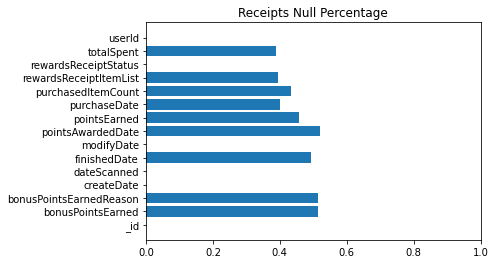

In [239]:
# 2. Checking if there are missing values or null values 
re_null_perc = pd.DataFrame(receipts.isnull().sum()/len(receipts))
plt.barh(re_null_perc.index, re_null_perc[0])
plt.title('Receipts Null Percentage')
plt.xlim(0,1);

# 9 out of 14 columns are missing approximately half of the data. 

In [240]:
# 3. Checking if continuous variables have outliers
receipts.describe()

,bonusPointsEarned,pointsEarned,purchasedItemCount,totalSpent
count,544.000000,609.000000,635.00000,684.000000
mean,238.893382,585.962890,14.75748,77.796857
std,299.091731,1357.166947,61.13424,347.110349
min,5.000000,0.000000,0.00000,0.000000
25%,5.000000,5.000000,1.00000,1.000000
50%,45.000000,150.000000,2.00000,18.200000
75%,500.000000,750.000000,5.00000,34.960000
max,750.000000,10199.800000,689.00000,4721.950000


In [258]:
receipts[receipts['totalSpent'] > 4000]

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
446,{'$oid': '600f24970a720f053500002f'},NaN,NaN,{'$date': 1611605143000},{'$date': 1611605143000},NaN,{'$date': 1611606325000},NaN,NaN,{'$date': 1611532800000},599.0,"[{'brandCode': 'BETTY CROCKER', 'description':...",FLAGGED,4368.80,600f20c15edb787dce060911
469,{'$oid': '600f39c30a7214ada2000030'},750.0,"Receipt number 1 completed, bonus point schedu...",{'$date': 1611610563000},{'$date': 1611610563000},{'$date': 1611630363000},{'$date': 1611630460000},{'$date': 1611630363000},7137.2,{'$date': 1611446400000},670.0,"[{'brandCode': 'BETTY CROCKER', 'description':...",FINISHED,4721.95,600f35015edb782098e2ac1b
543,{'$oid': '600f2fc80a720f0535000030'},750.0,"Receipt number 1 completed, bonus point schedu...",{'$date': 1611608008000},{'$date': 1611608008000},{'$date': 1611612263000},{'$date': 1611873422000},{'$date': 1611612263000},4944.7,{'$date': 1611446400000},689.0,"[{'brandCode': 'BETTY CROCKER', 'description':...",FINISHED,4566.17,600f29a64329897eac239049


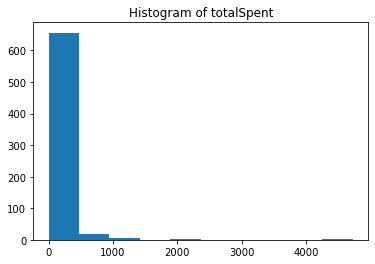

In [261]:
plt.hist(receipts['totalSpent'])
plt.title('Histogram of totalSpent');
# I have identified three receipts where the customers spent more than 4000 dollars. 

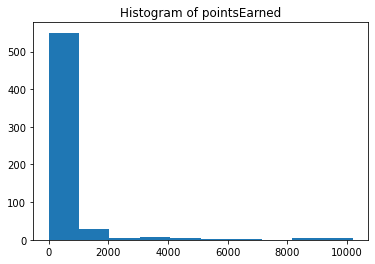

In [263]:
plt.hist(receipts['pointsEarned']);
plt.title('Histogram of pointsEarned');
# I have identified nine receipts where the customers earned more than 8000 points. 

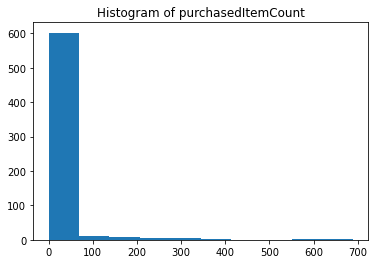

In [262]:
plt.hist(receipts['purchasedItemCount']);
plt.title('Histogram of purchasedItemCount');
# I have identified three receipts where the customers purchased more than 500 items. 

In [270]:
# 4. Checking if there are duplicate records (primary keys are unique)
receipts['_id'].duplicated().sum()

0

## Users Data Schema

In [102]:
# read in receipts file
users = pd.read_json('users.json', lines=True)

In [103]:
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


In [252]:
# 1. Checking if data types are correct 
users.dtypes
# Date columns (createdDate, lastLogin) should be updated to corresponding datetime formats.

_id             object
active            bool
createdDate     object
lastLogin       object
role            object
signUpSource    object
state           object
dtype: object

In [253]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _id           495 non-null    object
 1   active        495 non-null    bool  
 2   createdDate   495 non-null    object
 3   lastLogin     433 non-null    object
 4   role          495 non-null    object
 5   signUpSource  447 non-null    object
 6   state         439 non-null    object
dtypes: bool(1), object(6)
memory usage: 23.8+ KB


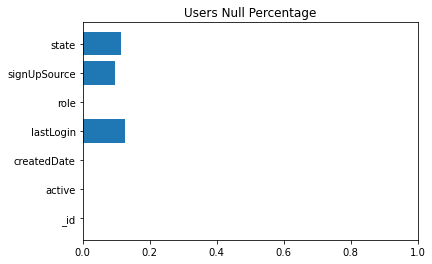

In [203]:
# 2. Checking if there are missing values or null values 
users_null_perc = pd.DataFrame(users.isnull().sum()/len(users))
plt.barh(users_null_perc.index, users_null_perc[0])
plt.title('Users Null Percentage')
plt.xlim(0,1);

In [271]:
# 4. Checking if there are duplicate records (primary keys are unique)
users['_id'].duplicated().sum()
# 57% of the Users Data are duplicate records.

283

## Brand Data Schema

In [104]:
# read in receipts file
brands = pd.read_json('brands.json', lines=True)

In [199]:
brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


In [254]:
# 1. Checking if data types are correct 
brands.dtypes
# topBrand is Boolean indicator for whether the brand should be featured as a 'top brand'
# topBrand should be updated to Bool data type.

_id              object
barcode           int64
category         object
categoryCode     object
cpg              object
name             object
topBrand        float64
brandCode        object
dtype: object

In [256]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           1167 non-null   object 
 1   barcode       1167 non-null   int64  
 2   category      1012 non-null   object 
 3   categoryCode  517 non-null    object 
 4   cpg           1167 non-null   object 
 5   name          1167 non-null   object 
 6   topBrand      555 non-null    float64
 7   brandCode     933 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 73.1+ KB


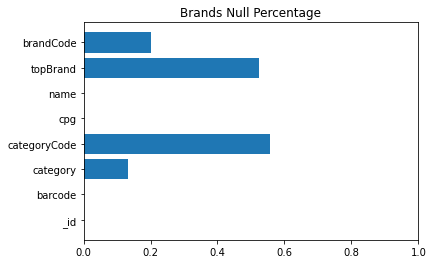

In [205]:
# 2. Checking if there are missing values or null values 
brands_null_perc = pd.DataFrame(brands.isnull().sum()/len(brands))
plt.barh(brands_null_perc.index, brands_null_perc[0])
plt.title('Brands Null Percentage')
plt.xlim(0,1);
# topBrand & categoryCode have over 50% of missing data

In [259]:
# 3. Checking if continuous variables have outliers
brands.describe()
# topBrand looks good for Boolean value

,barcode,topBrand
count,1.167000e+03,555.000000
mean,5.111115e+11,0.055856
std,2.874497e+05,0.229850
min,5.111110e+11,0.000000
25%,5.111112e+11,0.000000
50%,5.111114e+11,0.000000
75%,5.111117e+11,0.000000
max,5.111119e+11,1.000000


In [272]:
# 4. Checking if there are duplicate records (primary keys are unique)
brands['_id'].duplicated().sum()

0